<a href="https://colab.research.google.com/github/mohit579-pixel/SL2/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def perceptron_train(X, y, learning_rate=0.1, epochs=100):

    X = np.c_[np.ones((X.shape[0], 1)), X]


    weights = np.random.rand(X.shape[1])

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            prediction = np.dot(X[i], weights)
            error = y[i] - prediction
            weights += learning_rate * error * X[i]

    return weights

In [3]:
def perceptron_predict(X, weights):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    predictions = np.dot(X, weights)
    return np.where(predictions >= 0, 1, -1)

[[3.74540119 9.50714306]
 [7.31993942 5.98658484]
 [1.5601864  1.5599452 ]
 [0.58083612 8.66176146]
 [6.01115012 7.08072578]
 [0.20584494 9.69909852]
 [8.32442641 2.12339111]
 [1.81824967 1.8340451 ]
 [3.04242243 5.24756432]
 [4.31945019 2.9122914 ]
 [6.11852895 1.39493861]
 [2.92144649 3.66361843]
 [4.56069984 7.85175961]
 [1.99673782 5.14234438]
 [5.92414569 0.46450413]
 [6.07544852 1.70524124]
 [0.65051593 9.48885537]
 [9.65632033 8.08397348]
 [3.04613769 0.97672114]
 [6.84233027 4.40152494]
 [1.22038235 4.9517691 ]
 [0.34388521 9.09320402]
 [2.58779982 6.62522284]
 [3.11711076 5.20068021]
 [5.46710279 1.84854456]
 [9.69584628 7.75132823]
 [9.39498942 8.9482735 ]
 [5.97899979 9.21874235]
 [0.88492502 1.95982862]
 [0.45227289 3.25330331]
 [3.8867729  2.71349032]
 [8.28737509 3.56753327]
 [2.8093451  5.42696083]
 [1.40924225 8.02196981]
 [0.74550644 9.86886937]
 [7.72244769 1.98715682]
 [0.05522117 8.15461428]
 [7.06857344 7.29007168]
 [7.71270347 0.74044652]
 [3.58465729 1.1586906 ]


<ipython-input-2-d240e77e97ad>:12: RuntimeWarning: invalid value encountered in add
  weights += learning_rate * error * X[i]


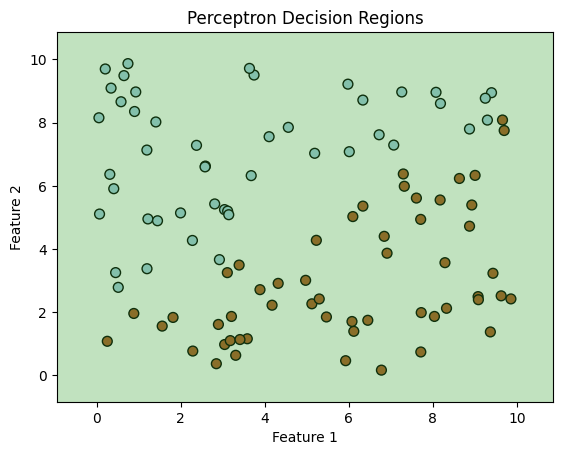

In [19]:
np.random.seed(42)
X = np.random.rand(100, 2) * 10
print(X)
y = np.where(2*X[:, 0] - 3*X[:, 1] + 5 > 0, 1, -1)
print(y)

weights = perceptron_train(X, y)


predictions = perceptron_predict(X, weights)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = perceptron_predict(np.c_[xx.ravel(), yy.ravel()], weights)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.title('Perceptron Decision Regions')
plt.show()